In [1]:
import pandas as pd
import zipfile
import geopandas as gpd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Specific features needed from PLUTO are;
* BldgArea of non city-owned or federal-owned lots
* Drop ResArea of non city-owned and non-federal owned lots = 0 
* ResArea of non city-owned or federal-owned lots ("OwnerName" is not "NYC Housing Authority" or "NYC Housing")
* UnitsRes of non city-owned or federal-owned lots ("OwnerName" is not "NYC Housing Authority" or "NYC Housing")
* AssessTot
* Built year
* Building class
* Num floors

In [2]:
def pluto(mappluto):
    z = zipfile.ZipFile(mappluto)
    z.extractall('../data_initial/')
    
    boroughs = ['Staten_Island', 'Queens', 'Manhattan', 'Bronx', 'Brooklyn']
    abreevs = ['SI', 'QN', 'MN', 'BX', 'BK']

    pluto = []
    i = 0
    for elem in boroughs:
        temp = gpd.read_file('../data_initial/'+elem+'/'+abreevs[i]+'MapPLUTO.shp')
        temp['BBL'] = temp['BBL'].astype(str)
        #temp = temp.to_crs({'init':'epsg:4326'})
        pluto.append(temp)
        i+=1  

    global pluto_updated
    pluto_updated = pd.concat(pluto)

    return pluto_updated.head()

In [3]:
pluto('../data_initial/mappluto_16v2.zip')

,APPBBL,APPDate,Address,AllZoning1,AllZoning2,AreaSource,AssessLand,AssessTot,BBL,BldgArea,...,YearAlter2,YearBuilt,ZMCode,ZipCode,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,ZoneMap,geometry
0,0.0,None,437 PURDY AVENUE,R3-1,None,7,15120.0,23400.0,5007470028.0,1488,...,0,1960,None,10314,R3-1,None,None,None,20d,"POLYGON ((944681.4200000018 161477.381400004, ..."
1,0.0,None,CUNARD AVENUE,R3A/HS,None,4,21518.0,21518.0,5006230252.0,0,...,0,0,None,10304,R3A,None,None,None,21d,"POLYGON ((959872.0577999949 162992.5866000056,..."
2,0.0,None,121 MOUNTAINVIEW AVENUE,R3-1,None,7,13561.0,22602.0,5007130017.0,1316,...,0,1920,None,10314,R3-1,None,None,None,21b,"POLYGON ((949278.1987999976 161346.9971999973,..."
3,0.0,None,26 FANNING STREET,R3X,None,7,9720.0,28740.0,5007140091.0,2188,...,0,1975,None,10314,R3X,None,None,None,21b,"POLYGON ((950061.0491999984 160815.3023999929,..."
4,0.0,None,335 SIMONSON AVENUE,R3A,None,7,7617.0,22118.0,5011840039.0,2392,...,0,1965,None,10303,R3A,None,None,None,20c,"POLYGON ((941981.4906000048 168120.2173999995,..."


In [161]:
pluto_updated.to_csv('../data_processed/pluto_16')

### there are no 'ownernames' with 'nyc housing authority' or 'nyc housing' so using ownertype instead

In [223]:
t1 = pluto_updated[pluto_updated['UnitsRes'] != 0]
t1 = t1[(t1['OwnerType'] != 'O') & (t1['OwnerType'] != 'C')]

In [162]:
t1['OwnerType'].unique()

array([None, u'X', u'P', u'M'], dtype=object)

In [28]:
len(t1)

759588

In [35]:
t2 = pluto_updated[pluto_updated['ResArea'] != 0]
t2 = t2[(t2['OwnerType'] != 'O') & (t2['OwnerType'] != 'C')]

In [36]:
len(t2)

756934

### selecting to use 'unitsres' as the value for not equalling zero because there are more rows included

In [224]:
t1.columns

Index([    u'APPBBL',    u'APPDate',    u'Address', u'AllZoning1',
       u'AllZoning2', u'AreaSource', u'AssessLand',  u'AssessTot',
              u'BBL',   u'BldgArea',  u'BldgClass',  u'BldgDepth',
        u'BldgFront',      u'Block',   u'BoroCode',    u'Borough',
         u'BsmtCode',  u'BuiltCode',   u'BuiltFAR',     u'CB2010',
               u'CD',     u'CT2010',    u'ComArea',    u'CommFAR',
          u'CondoNo',    u'Council',  u'EDesigNum',  u'Easements',
       u'ExemptLand',  u'ExemptTot',        u'Ext',   u'FacilFAR',
       u'FactryArea',   u'FireComp', u'GarageArea', u'HealthArea',
         u'HistDist', u'IrrLotCode',    u'LandUse',   u'Landmark',
              u'Lot',    u'LotArea',   u'LotDepth',   u'LotFront',
          u'LotType',  u'LtdHeight', u'MAPPLUTO_F',   u'NumBldgs',
        u'NumFloors', u'OfficeArea',  u'OtherArea',   u'Overlay1',
         u'Overlay2',  u'OwnerName',  u'OwnerType', u'PLUTOMapID',
       u'PolicePrct',   u'ProxCode',    u'ResArea',   u'ResidF

In [225]:
t1 = t1.drop(['APPBBL', 'APPDate', 'Address', 'AreaSource', 'BldgDepth', 'BldgFront', \
                                   'Block', 'BoroCode', 'Borough', 'CB2010', 'CD', 'CT2010', 'ComArea', \
                                   'CommFAR', 'CondoNo', 'Council', 'EDesigNum', 'FacilFAR', 'FactryArea', \
                                   'FireComp', 'GarageArea', 'HealthArea', 'HistDist', 'IrrLotCode', 'Landmark', \
                                   'Lot', 'LotArea', 'LotDepth', 'LotFront', 'LtdHeight', 'MAPPLUTO_F', \
             'OfficeArea', 'OtherArea', 'Overlay1', 'Overlay2', 'PLUTOMapID', 'PolicePrct', 'ResidFAR', \
             'RetailArea', 'Sanborn', 'SchoolDist', 'StrgeArea', 'TaxMap', 'Tract2010', 'YearAlter1', \
             'YearAlter2', 'ZoneDist1', 'ZipCode', 'ZoneDist2', 'ZoneDist3', 'ZoneDist4', 'ZoneMap', \
             'XCoord', 'Version', 'YCoord', 'ZMCode', 'SPDist1', 'SPDist2', 'ExemptTot', 'BuiltCode', \
             'AllZoning1', 'AllZoning2', 'ExemptLand', 'geometry', 'Easements', 'SHAPE_Area', 'SHAPE_Leng', \
             'OwnerName', 'Ext', 'SplitZone'], axis=1)

In [226]:
t1.columns

Index([u'AssessLand', u'AssessTot', u'BBL', u'BldgArea', u'BldgClass',
       u'BsmtCode', u'BuiltFAR', u'LandUse', u'LotType', u'NumBldgs',
       u'NumFloors', u'OwnerType', u'ProxCode', u'ResArea', u'UnitsRes',
       u'UnitsTotal', u'YearBuilt'],
      dtype='object')

### explanation of variables in dataset
* assessland -  tentative assessed land value for Fiscal Year 2017
* assesstot - tentative assessed total value for Fiscal Year 2017
* bldgarea - total gross area in square feet
* bldgclass - code describing the major use of structures on the tax lot
* bsmtcode - code describing the basement type/grade - 0: no basement, 1: full basement above grade, 2: full basement below grade, 3: partial basement above grade, 4: partial basement below grade, 5: unknown
* landuse - code for the tax lot's land use category (01-09)
* lottype - code indicating the location of the tax lot to another tax lot and/or the water (1-9)
* numbldgs - number of buildings in the tax lot
* numfloors - the tallest building on the tax lot, the number of full and partial stories starting from the ground floor
* ownertype - M: mix city and private ownership, P: private ownership, X: mixed (excludes C, M, O, or P ownerships), blank: unknown
* proxcode - physical relationship of the building to neighboring buildings - 0: not available, 1: detatched, 2: semi-attached, 3: attached
* resarea - estimate of the exterior dimensions of the portion of the structure(s) allocated for residential use
* unitsres - sum of residential units in all buildings on the tax lot
* unitstotal - sum of residential and non-residential (offices, retail stores, etc.) units in all buildings on the tax lot
* yearbuilt - year structure was built

### merge pluto with complaint data

In [227]:
comp = pd.read_csv('../data_processed/311_heathotwater_2014_2016_BBL_WEEK_AVG.csv')
comp.head()

,BBL,com_count,BBL.1
0,1000047501,0.020408,1000047501
1,1000100032,0.006803,1000100032
2,1000150022,0.006803,1000150022
3,1000160015,0.006803,1000160015
4,1000160020,0.013605,1000160020


In [228]:
comp = comp.drop('BBL.1',axis=1)

In [229]:
print comp['BBL'].dtypes
print t1['BBL'].dtypes

int64
object


In [230]:
import numpy as np

In [231]:
t1['BBL'] = pd.to_numeric(t1['BBL'])

In [232]:
bbl = np.array(t1['BBL'])
bbl = bbl.astype(int)

In [233]:
t1['BBL'] = bbl

In [234]:
print comp['BBL'].dtypes
print t1['BBL'].dtypes

int64
int64


In [321]:
features = pd.merge(t1, comp, on ='BBL')

In [322]:
print len(t1)
print len(comp)
print len(features)

758026
53310
51584


In [237]:
features.head()

,AssessLand,AssessTot,BBL,BldgArea,BldgClass,BsmtCode,BuiltFAR,LandUse,LotType,NumBldgs,NumFloors,OwnerType,ProxCode,ResArea,UnitsRes,UnitsTotal,YearBuilt,com_count
0,8441.0,22118.0,5010310021,4710,C0,2,0.70,02,5,1,2.75,None,1,4710,3,3,1920,0.013605
1,6480.0,24120.0,5012460037,2700,B2,2,0.92,01,5,1,2.00,None,1,2700,2,2,2003,0.034014
2,9007.0,30273.0,5033390088,1976,B1,2,0.48,01,5,1,2.00,None,1,1976,2,2,1955,0.054422
3,3980.0,11344.0,5000810024,1344,A1,2,0.54,01,5,1,2.00,None,1,1344,1,1,1901,0.074830
4,96750.0,324900.0,5000440001,14156,C9,5,0.66,02,3,1,2.00,P,0,14156,16,16,1984,0.006803


In [323]:
features = features.drop('BBL',axis=1)

In [326]:
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import preprocessing

In [327]:
le = preprocessing.LabelEncoder()

In [343]:
le.fit([elem for elem in features['BldgClass'].unique()])
features['bc_updated'] = le.transform([elem for elem in features['BldgClass']])
le.fit([elem for elem in features['OwnerType'].unique()])
features['ot_updated'] = le.transform([elem for elem in features['OwnerType']])

In [346]:
features = features.drop(['BldgClass', 'OwnerType'],axis=1)

In [347]:
features.dtypes

AssessLand    float64
AssessTot     float64
BldgArea        int64
BsmtCode       object
BuiltFAR      float64
LandUse        object
LotType        object
NumBldgs        int64
NumFloors     float64
ProxCode       object
ResArea         int64
UnitsRes        int64
UnitsTotal      int64
YearBuilt       int64
com_count     float64
bc_updated      int64
ot_updated      int64
dtype: object

In [354]:
features = features.apply(pd.to_numeric)
features = features.astype(int)

In [352]:
.head(2)

,AssessLand,AssessTot,BldgArea,BsmtCode,BuiltFAR,LandUse,LotType,NumBldgs,NumFloors,ProxCode,ResArea,UnitsRes,UnitsTotal,YearBuilt,bc_updated,ot_updated
0,8441.0,22118.0,4710,2,0.70,2,5,1,2.75,1,4710,3,3,1920,12,0
1,6480.0,24120.0,2700,2,0.92,1,5,1,2.00,1,2700,2,2,2003,9,0


In [355]:
model = ExtraTreesClassifier()
model.fit(features.ix[:,[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16]], features.ix[:,-3])
# display the relative importance of each attribute
print(model.feature_importances_)

[ 0.11442359  0.12250932  0.11442473  0.0178226   0.05994776  0.01506585
  0.02753915  0.0096054   0.03552453  0.01432124  0.11699965  0.09904208
  0.1013609   0.10013728  0.03617979  0.01509612]


In [362]:
significance = pd.DataFrame()
significance['feature_name'] = features.ix[:,[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16]].columns
significance['value'] = model.feature_importances_

In [366]:
significance = significance.sort_values('value',ascending=False)
significance

,feature_name,value
1,AssessTot,0.122509
10,ResArea,0.117000
2,BldgArea,0.114425
0,AssessLand,0.114424
12,UnitsTotal,0.101361
13,YearBuilt,0.100137
11,UnitsRes,0.099042
4,BuiltFAR,0.059948
14,bc_updated,0.036180
8,NumFloors,0.035525


### create dummy variables for strings and categorical variables

In [242]:
var = []
for elem in features['BldgClass']:
    var.append(elem)
var2 = []
for i in range(0,len(var)):
    var2.append(('bc_' + var[i][0]))
features['bldgclass_updated'] = var2

var = []
for elem in features['BsmtCode']:
    var.append(elem)
var2 = []
for i in range(0,len(var)):
    if var[i] == '0':
        var2.append('no_bsmt')
    elif var[i] == '1':
        var2.append('fbag')
    elif var[i] == '2':
        var2.append('fbbg')
    elif var[i] == '3':
        var2.append('pbag')
    elif var[i] == '4':
        var2.append('pbbg')
    elif var[i] == '5':
        var2.append('unknwon_bsmt')
features['bsmtcode_updated'] = var2

In [243]:
var = []
for elem in features['OwnerType']:
    var.append(elem)
var2 = []
for i in range(0,len(var)):
    if var[i] == 'X':
        var2.append('ot_m')
    elif var[i] == 'P':
        var2.append('ot_p')
    elif var[i] == 'M':
        var2.append('ot_mcp')
    elif var[i] == None:
        var2.append('ot_unknown')
features['ownertype_updated'] = var2

In [244]:
var = []
for elem in features['LandUse']:
    var.append(elem)
var2 = []
for i in range(0,len(var)):
    if var[i] == '01':
        var2.append('lu_1_2_fam')
    elif var[i] == '02':
        var2.append('lu_mf_wu')
    elif var[i] == '03':
        var2.append('lu_fam_el')
    elif var[i] == '04':
        var2.append('lu_mrc')
    elif var[i] == '05':
        var2.append('lu_co')
    elif var[i] == '06':
        var2.append('lu_im')
    elif var[i] == '07':
        var2.append('lu_tu')
    elif var[i] == '08':
        var2.append('lu_fi')
    elif var[i] == '09':
        var2.append('lu_os_or')
    elif var[i] == '10':
        var2.append('lu_pf')
    elif var[i] == '11':
        var2.append('lu_v')
features['landuse_updated'] = var2

In [245]:
var = []
for elem in features['LotType']:
    var.append(elem)
var2 = []
for i in range(0,len(var)):
    if var[i] == '0':
        var2.append('lt_unk')
    elif var[i] == '1':
        var2.append('lt_ba')
    elif var[i] == '2':
        var2.append('lt_wf')
    elif var[i] == '3':
        var2.append('lt_c')
    elif var[i] == '4':
        var2.append('lt_thr')
    elif var[i] == '5':
        var2.append('lt_ins')
    elif var[i] == '6':
        var2.append('lt_int')
    elif var[i] == '7':
        var2.append('lt_isl')
    elif var[i] == '8':
        var2.append('lt_alley')
    elif var[i] == '9':
        var2.append('lt_sub')
features['lottype_updated'] = var2

In [246]:
var = []
for elem in features['ProxCode']:
    var.append(elem)
var2 = []
for i in range(0,len(var)):
    if var[i] == '0':
        var2.append('pc_unavail')
    elif var[i] == '1':
        var2.append('pc_det')
    elif var[i] == '2':
        var2.append('pc_sa')
    elif var[i] == '3':
        var2.append('pc_att')
features['proxcode_updated'] = var2

In [247]:
features = features.drop(['BldgClass', 'BsmtCode', 'LandUse', 'LotType', 'ProxCode'], axis=1)

In [248]:
pc = pd.get_dummies(features['proxcode_updated'])
lt = pd.get_dummies(features['lottype_updated'])
lu = pd.get_dummies(features['landuse_updated'])
ot = pd.get_dummies(features['ownertype_updated'])
btc = pd.get_dummies(features['bsmtcode_updated'])
bc = pd.get_dummies(features['bldgclass_updated'])

In [249]:
dummies = pd.concat([pc, lt, lu, ot, btc, bc], axis=1)

In [251]:
features = features.drop(['proxcode_updated', 'lottype_updated', 'landuse_updated', 'ownertype_updated',\
                         'bsmtcode_updated', 'bldgclass_updated'], axis=1)

In [256]:
up = pd.concat([dummies, features], axis=1)

In [257]:
up = up.drop('BBL', axis=1)

In [258]:
up.head(2)

,pc_att,pc_det,pc_sa,pc_unavail,lt_alley,lt_ba,lt_c,lt_ins,lt_int,lt_isl,...,BldgArea,BuiltFAR,NumBldgs,NumFloors,OwnerType,ResArea,UnitsRes,UnitsTotal,YearBuilt,com_count
0,0,1,0,0,0,0,0,1,0,0,...,4710,0.70,1,2.75,None,4710,3,3,1920,0.013605
1,0,1,0,0,0,0,0,1,0,0,...,2700,0.92,1,2.00,None,2700,2,2,2003,0.034014


In [268]:
up = up.drop('OwnerType',axis=1)

In [284]:
up.ix[:,50:-1].head(2)

,AssessLand,AssessTot,BldgArea,BuiltFAR,NumBldgs,NumFloors,ResArea,UnitsRes,UnitsTotal,YearBuilt
0,8441.0,22118.0,4710,0.70,1,2.75,4710,3,3,1920
1,6480.0,24120.0,2700,0.92,1,2.00,2700,2,2,2003


In [299]:
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

In [317]:
test = test.apply(pd.to_numeric)
test = test.astype(int)

In [303]:
test = features.drop('BBL',axis=1)

In [307]:
test = test.drop('OwnerType', axis=1)

In [318]:
model = ExtraTreesClassifier()
model.fit(test.ix[:,:-1], test.ix[:,-1])
# display the relative importance of each attribute
print(model.feature_importances_)

[ 0.13799181  0.14341042  0.13986274  0.06278452  0.01048316  0.04490474
  0.13652342  0.10589554  0.10309685  0.1150468 ]


In [319]:
test.head()

,AssessLand,AssessTot,BldgArea,BuiltFAR,NumBldgs,NumFloors,ResArea,UnitsRes,UnitsTotal,YearBuilt,com_count
0,8441,22118,4710,0,1,2,4710,3,3,1920,0
1,6480,24120,2700,0,1,2,2700,2,2,2003,0
2,9007,30273,1976,0,1,2,1976,2,2,1955,0
3,3980,11344,1344,0,1,2,1344,1,1,1901,0
4,96750,324900,14156,0,1,2,14156,16,16,1984,0


### use ridge and lasso for feature selection

In [269]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [291]:
X_train, X_test, y_train, y_test = train_test_split(up.ix[:,:-1],
                                    up.ix[:,-1], test_size = 0.4, random_state = 200)

In [292]:
#Find the Alpha and report best test performance for Ridge/Lasso.

def Regularization_fit_lambda(model,X_train,y_train,lambdas,p=0.4,Graph=False, logl=False):
    #model = 1-Ridge, 2-Lasso
    #lambdas: a list of lambda values to try
    #p: ratio of the validation sample size / total training size
    #Graph: plot the graph of R^2 values for different lambda

    R_2_OS=[]
    X_train0, X_valid, y_train0, y_valid = train_test_split(X_train,
                                    y_train, test_size = 0.4, random_state = 200)

    if model==1:
        RM = lambda a: linear_model.Ridge(fit_intercept=True, alpha=a)
        model_label='Ridge'
    else:
        RM = lambda a: linear_model.Lasso(fit_intercept=True, alpha=a)
        model_label='Lasso'
    
    best_R2 = -1
    best_lambda = lambdas[0]
    
    for i in lambdas:
        lm = RM(i)
        lm.fit(X_train0,y_train0)  #fit the regularization model
        y_predict=lm.predict(X_valid) #compute the prediction for the validation sample 
        err_OS=y_predict-y_valid
        R_2_OS_=1-np.var(err_OS)/np.var(y_valid)
        R_2_OS.append(R_2_OS_)
        if R_2_OS_ > best_R2:
            best_R2 = R_2_OS_
            best_lambda = i
    
    if Graph==True:
        plt.title('IS R-squared vs OS-R-squared for different Lambda')
        if logl:
            plt.xlabel('ln(Lambda)')
            l=log(lambdas)
            bl=log(best_lambda)
        else:
            plt.xlabel('Lambda')
            l=lambdas
            bl=best_lambda
        plt.plot(l,R_2_OS,'b',label=model_label)
        plt.legend(loc='upper right')
        plt.ylabel('R-squared')
        plt.axvline(bl,color='r',linestyle='--')

        plt.show()
    
    return best_lambda

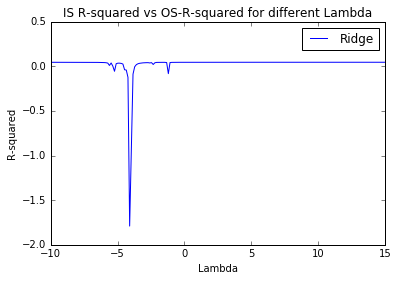

Optimal lambda for Ridge=15.0


In [298]:
#select best lambda for Ridge
lambdas = np.linspace(-10,15,200)
lambda_r_optimal=Regularization_fit_lambda(1,X_train,y_train,lambdas,p=0.4,Graph=True)
print('Optimal lambda for Ridge={0}'.format(lambda_r_optimal))
#y axis is the validation r squared and x is the lambda

In [294]:
Ridge = linear_model.Ridge(fit_intercept=True,alpha=lambda_r_optimal) #try Ridge with a selected regularization parameter lambda

Ridge.fit(X_train,y_train)
# In the sample:
p_IS=Ridge.predict(X_train)
err_IS=p_IS-y_train
R_2_IS_Ridge=1-np.var(err_IS)/np.var(y_train)
print("The R-squared we found for IS Ridge is: {0}".format(R_2_IS_Ridge))

Ridge_coef=Ridge.coef_
#Out of sample
p_OS=Ridge.predict(X_test)
err_OS=p_OS-y_test
R_2_OS_Ridge=1-np.var(err_OS)/np.var(y_test)
print("The R-squared we found for OS Ridge is: {0}".format(R_2_OS_Ridge))

The R-squared we found for IS Ridge is: 0.0531247666653
The R-squared we found for OS Ridge is: -0.129194974679


In [295]:
Lasso=linear_model.Lasso(fit_intercept=True,alpha=100)
#try Ridge with a selected regularization parameter lambda

Lasso.fit(X_train,y_train)
# In the sample:
p_IS=Lasso.predict(X_train)
err_IS=p_IS-y_train
R_2_IS_Lasso=1-np.var(err_IS)/np.var(y_train)
print("The R-squared we found for IS Lasso is: {0}".format(R_2_IS_Ridge))

Lasso_coef=Lasso.coef_
#Out of sample
p_OS=Lasso.predict(X_test)
err_OS=p_OS-y_test
R_2_OS_Lasso=1-np.var(err_OS)/np.var(y_test)
print("The R-squared we found for OS Lasso is: {0}".format(R_2_OS_Lasso))

The R-squared we found for IS Lasso is: 0.0531247666653
The R-squared we found for OS Lasso is: 0.0164181569475


/Users/kristikorsberg/devel/venv/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


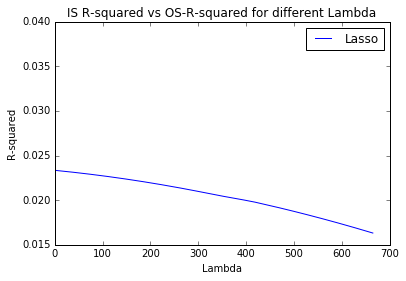

Optimal lambda for Lasso=0.00673794699909


In [296]:
lambdas=np.exp(np.linspace(-5,6.5,200))
lambda_l_optimal=Regularization_fit_lambda(2,X_train,y_train,lambdas,p=0.4,Graph=True)
print('Optimal lambda for Lasso={0}'.format(lambda_l_optimal))

In [297]:
Lasso=linear_model.Lasso(fit_intercept=True,alpha=lambda_l_optimal)
#try Ridge with a selected regularization parameter lambda

Lasso.fit(X_train,y_train)
# In the sample:
p_IS=Lasso.predict(X_train)
err_IS=p_IS-y_train
R_2_IS_Lasso=1-np.var(err_IS)/np.var(y_train)
print("The R-squared we found for IS Lasso is: {0}".format(R_2_IS_Ridge))

Lasso_coef=Lasso.coef_
#Out of sample
p_OS=Lasso.predict(X_test)
err_OS=p_OS-y_test
R_2_OS_Lasso=1-np.var(err_OS)/np.var(y_test)
print("The R-squared we found for OS Lasso is: {0}".format(R_2_OS_Lasso))

The R-squared we found for IS Lasso is: 0.0531247666653
The R-squared we found for OS Lasso is: -0.44820514454
